# Self Study 12: The Hicks Model


## Section 1: Hicks Model with autonomous investment

The model is given by the following equations:

$$
\begin{align}
C_t &= c_0 + c Y_t \\
I_t &= I_0 (1+g)^t + b * (Y_t - Y_{t-1}) \\
Y_t &= C_t + I_t \\
\end{align}
$$

where $c_0, c, I_0, g, b$ are positive constants.

Note, that unlike in the previous self study, in the Hicks model investment has both an autonomous and an induced component. The autonomous component is given by $I_0 (1+g)^t$ and the induced component is given by $b * (Y_t - Y_{t-1})$.

### Task 1: Find the update rule for $Y_t$, either with `sympy` or by hand.

In [1]:
import sympy as sp
c0, c, I0, g, t, b = sp.symbols('c0 c I0 g t b')

C = sp.Function('C')
I = sp.Function('I')
Y = sp.Function('Y')

def Y_func(t):
    return C_func(c0,c,t,Y) + I_func(I0,g,t,b,Y)

def C_func(c0, c, t, Y):
    return c0+c*Y(t-1)

def I_func(I0, g, t, b, Y):
    return I0*(1+g)**t + b*(Y(t-1)-Y(t-2))

update_rule = sp.solve(sp.Eq(Y(t),Y_func(t)), Y(t))[0] # type: ignore

update_rule

I0*(g + 1)**t - b*Y(t - 2) + b*Y(t - 1) + c*Y(t - 1) + c0

## Task 2: Find the equilibrium output $Y^*$

In [2]:
Y_star = sp.symbols('Y^*')
equilib_init = update_rule.subs({Y(t-i): Y_star for i in range(0,3)})

hicks_equilibrium = sp.solve(sp.Eq(Y_star, equilib_init), Y_star)[0]

hicks_equilibrium

(-I0*(g + 1)**t - c0)/(c - 1)

**Question:** What is unique about this equilibrium solution?

**Answer:** The equilibrium solution is not unique. The equilibrium solution changes with time, $t$.

## Section 2: Describe the behavior of the system

Using the characteristics equation approach we have discussed in class and in the last self study (SS11) write the equation for $Y_t$ you found above in the form of a second order difference equation and find its characteristics roots.

Assume that $I_0 (1 + g)^t + c_0=0$, which makes this a homogenous equation which only depends on $Y(\cdot)$, $b$ and $c$.

In [3]:
sp.Eq(Y(t), update_rule.subs({I0: 0, c0: 0}))
sp.factor(update_rule, Y(t-1))



I0*(g + 1)**t - b*Y(t - 2) + c0 + (b + c)*Y(t - 1)

**Question:** When are these roots real?

**Answer:**

**Question:** Assuming that the roots are real, what is the condition for stability?

**Answer:** 

## Section 3: Introducing maximum and minimum output

These results are very similar to the Samuelson model discussed in the last self study.
As we have noted, while the model is able to generate cycles, they are structurally unstable; a slight shift ing $b$ above or blow 1 leads the system to either ex or implode.

Hicks (1950) proposed that we add a ceilings and floors to the output.

Speficially we will assume that the evolution of output is given by:

$$
Y_t = (b + c) Y_{t - 1} - b Y_{t - 2 } + I_{0} (g + 1)^{t}+ c_{0} 
$$

but now, ever time this output falls below $Y_{min}$ or above $Y_{max}$, the output is reset to $Y_{min}$ or $Y_{max}$ respectively.

$$
Y_\text{min} = \frac{c_0+I_0 (1+g)^t - d}{1-c}
$$

$$
Y_\text{max} = \frac{c_0+I_0 (1+g)^t + m \times t}{1-c}
$$

where $d$ and $m$ are positive constants describing the distance from the equilibrium output (you found above).

### Task 1: Write the model in python using either recursion, for loops or OOP.

### Task 2: Plot the evolution for the following parameter values:

`b=3.5, c=0.6, g=0.03, d=1.4, m=1.1, I_0=1, c_0=1, Y0=5, Y1=4, t_max=100`

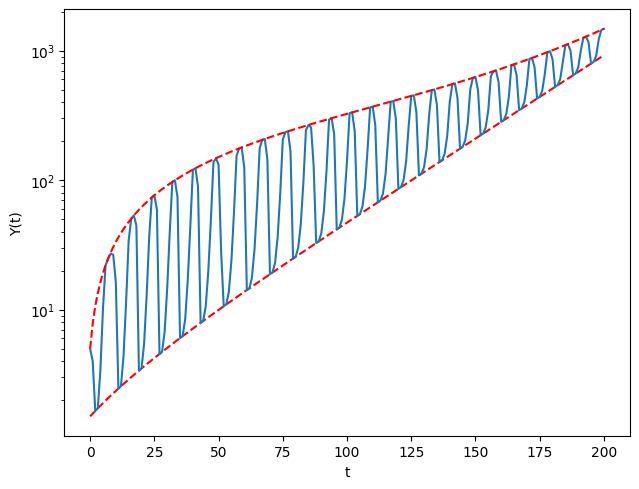

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache

@lru_cache(maxsize=None)
def y(t, b, c, I0, g, c0, y0, y1, d, m):
    if t==0:
        return y0
    elif t==1:
        return y1
    else:
        y_tm1 = y(t-1, b, c, I0, g, c0, y0, y1, d, m)
        y_tm2 = y(t-2, b, c, I0, g, c0, y0, y1, d, m)
        unbounded_production = (b+c)*y_tm1 - b*y_tm2 + I0*(1+g)**t + c0
        y_min = (c0+I0*(1+g)**t-d)/(1-c)
        y_max = (c0+I0*(1+g)**t+m*t)/(1-c)
        return max(min(unbounded_production, y_max), y_min)
    
params = dict(b = 3.5, c = 0.6, g = 0.03, d = 1.4, m = 1.1, I0 = 1, c0 = 1, y0 = 5, y1 = 4)
t_max = 200
t = np.linspace(0,t_max, t_max+1) 

def plot_hicks(params):
    y_vals = [y(t, **params) for t in t]
    lower_bound = [(params['c0']+params['I0']*(1+params['g'])**t-params['d'])/(1-params['c']) for t in range(t_max+1)]
    upper_bound = [(params['c0']+params['I0']*(1+params['g'])**t+params['m']*t)/(1-params['c']) for t in range(t_max+1)]
    plt.plot(lower_bound, 'r--')
    plt.plot(t, y_vals)
    plt.plot(upper_bound, 'r--')
    plt.tight_layout()
    plt.xlabel('t')
    plt.ylabel('Y(t)')
    plt.yscale('log')
    plt.show()

plot_hicks(params)
